In [1]:
import tensorflow as tf
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_data,train_labels), (test_data,test_labels) = mnist.load_data()
print(train_data.shape, test_data.shape)
print(train_labels.shape,test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [4]:
digits_data = np.vstack([train_data,test_data])
digits_label = np.hstack([train_labels,test_labels])

digits_data.shape
digits_label.shape


(70000,)

<Axes: ylabel='count'>

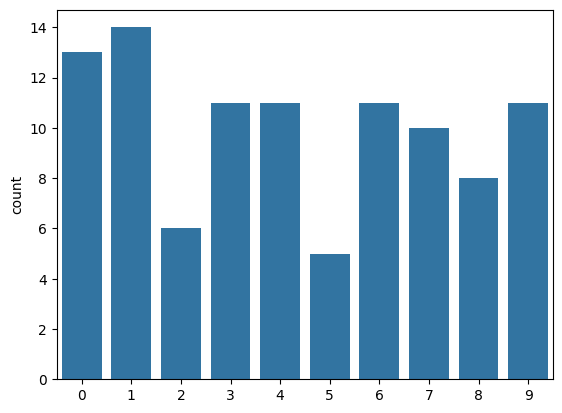

In [5]:
sns.countplot(x=digits_label[:100]) 

importing kaggle A/Z dataset

In [ ]:
# !curl -O https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

In [ ]:
# zipObject = zipfile.ZipFile(file = "alfabeto_A-Z.zip",mode='r')
# zipObject.extractall('./')
# zipObject.close()

In [6]:
datasetAZ = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

In [ ]:
print(datasetAZ)

In [11]:
alphabetData = datasetAZ.drop(labels='0',axis=1)
alphabetLabels = datasetAZ['0']

In [8]:
print(alphabetData.shape,alphabetLabels.shape)

(372450, 784) (372450,)


In [16]:
print(alphabetLabels)
print(len(alphabetLabels))

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32
372450


In [12]:
alphabetData = np.reshape(alphabetData.values,(alphabetData.shape[0],28,28))

In [ ]:
print(alphabetData.shape)

Text(0.5, 1.0, 'CLASS: 14.0')

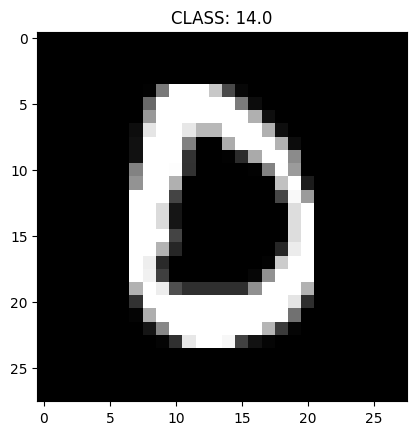

In [13]:
index = np.random.randint(0,alphabetData.shape[0])
plt.imshow(alphabetData[index],cmap='gray')
plt.title("CLASS: "+str(alphabetLabels[index]))

<Axes: xlabel='Alphabets Index', ylabel='count'>

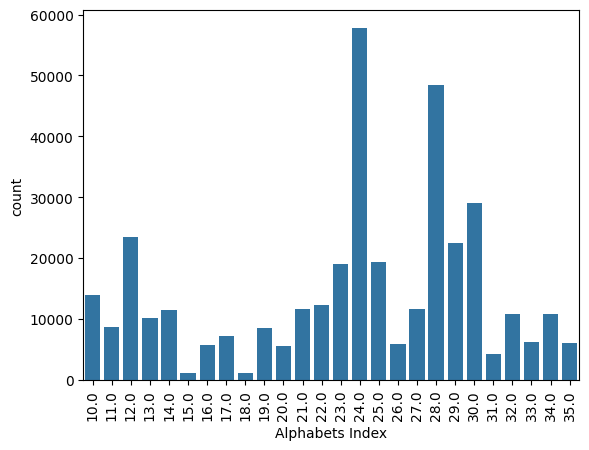

In [52]:
plt.xlabel("Alphabets Index")
plt.xticks(rotation=90)
sns.countplot(x=alphabetLabels[:len(alphabetLabels)] )


JOINING THE DATASETS OF A to Z and numbers 

In [45]:
alphabetLabels = alphabetLabels +10

In [46]:
print(alphabetLabels)


0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
372445    35.0
372446    35.0
372447    35.0
372448    35.0
372449    35.0
Name: 0, Length: 372450, dtype: float32


In [47]:
data = np.vstack([alphabetData,digits_data])
labels = np.hstack([alphabetLabels,digits_label])


In [49]:
print("DATA SHAPE :",data.shape,"LABEL SHAPE :",labels.shape)

DATA SHAPE : (442450, 28, 28) LABEL SHAPE : (442450,)


In [ ]:
data = np.array(data,dtype='float32')

In [50]:
data = np.expand_dims(data,axis=-1)


In [51]:
print(data.shape)

(442450, 28, 28, 1)
